# Miami Heat Model Prediction Season 20-21

### In this notebook we want to make a prediction model in order to know if the Miami Heat will win or not the next game and also to know what variables within the team have an impact on the probability of winning and measure that impact.

## 1.- Import NBA Data

In [1]:
# First we install the NBA Api
!pip install nba_api

In [2]:
## Now we import NBA API
## Import pandas library
import nba_api
import pandas as pd

We stract all the information from each NBA Team and we look for the Miami Heat ID

In [3]:
# Import NBA Teams library
from nba_api.stats.static import teams

In [4]:
team_dict=teams.get_teams()

In [5]:
MH=[team for team in team_dict if team['full_name']== 'Miami Heat'][0]

In [6]:
MH_ID=MH['id']
MH_ID

1610612748

After we got the Miami Heat's ID we proceed to stract the statistics from all the games the Heat has played

In [7]:
from nba_api.stats.endpoints import leaguegamefinder

In [8]:
MH_games=leaguegamefinder.LeagueGameFinder(team_id_nullable=MH_ID).get_data_frames()[0]

In [9]:
MH_games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612748,MIA,Miami Heat,0022000145,2021-05-09,MIA @ BOS,W,240,130,...,0.909,3,32,35,30,8,2,11,20,6.0
1,22020,1610612748,MIA,Miami Heat,0022001005,2021-05-07,MIA vs. MIN,W,240,121,...,0.741,8,29,37,27,9,2,14,22,9.0
2,22020,1610612748,MIA,Miami Heat,0022000986,2021-05-04,MIA vs. DAL,L,240,113,...,0.810,8,31,39,30,9,2,12,17,-14.0
3,22020,1610612748,MIA,Miami Heat,0022000969,2021-05-02,MIA @ CHA,W,240,121,...,0.741,11,31,42,30,10,6,11,22,10.0
4,22020,1610612748,MIA,Miami Heat,0022000960,2021-05-01,MIA @ CLE,W,241,124,...,0.800,10,27,37,30,12,1,8,16,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,21988,1610612748,MIA,Miami Heat,0028800070,1988-11-15,MIA vs. BOS,L,240,65,...,0.500,19,26,45,18,14,4,20,23,NaN
3068,21988,1610612748,MIA,Miami Heat,0028800051,1988-11-11,MIA vs. HOU,L,240,100,...,0.720,17,14,31,25,11,3,16,20,NaN
3069,21988,1610612748,MIA,Miami Heat,0028800037,1988-11-09,MIA @ SAN,L,240,93,...,0.679,16,21,37,14,10,6,24,23,NaN
3070,21988,1610612748,MIA,Miami Heat,0028800027,1988-11-08,MIA @ DAL,L,240,88,...,0.696,18,27,45,18,10,3,11,24,NaN


## 2.- Selecting the Information for our Model

Since we want to analyse the information of current season games (2020-2021=, we substract the informacion regarding SEASON_ID=22020

In [10]:
MH_games_2020=MH_games[MH_games['SEASON_ID']=='22020']
MH_games_2020

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22020,1610612748,MIA,Miami Heat,0022000145,2021-05-09,MIA @ BOS,W,240,130,...,0.909,3,32,35,30,8,2,11,20,6.0
1,22020,1610612748,MIA,Miami Heat,0022001005,2021-05-07,MIA vs. MIN,W,240,121,...,0.741,8,29,37,27,9,2,14,22,9.0
2,22020,1610612748,MIA,Miami Heat,0022000986,2021-05-04,MIA vs. DAL,L,240,113,...,0.810,8,31,39,30,9,2,12,17,-14.0
3,22020,1610612748,MIA,Miami Heat,0022000969,2021-05-02,MIA @ CHA,W,240,121,...,0.741,11,31,42,30,10,6,11,22,10.0
4,22020,1610612748,MIA,Miami Heat,0022000960,2021-05-01,MIA @ CLE,W,241,124,...,0.800,10,27,37,30,12,1,8,16,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,22020,1610612748,MIA,Miami Heat,0022000071,2021-01-01,MIA @ DAL,L,240,83,...,0.720,5,36,41,20,10,2,14,24,-10.0
64,22020,1610612748,MIA,Miami Heat,0022000058,2020-12-30,MIA vs. MIL,W,240,119,...,0.828,10,42,52,25,5,5,22,18,11.0
65,22020,1610612748,MIA,Miami Heat,0022000051,2020-12-29,MIA vs. MIL,L,240,97,...,0.667,3,27,30,23,9,6,21,18,-47.0
66,22020,1610612748,MIA,Miami Heat,0022000005,2020-12-25,MIA vs. NOP,W,237,111,...,0.826,4,31,35,29,11,2,17,25,13.0


Now we select the information we want to analyse. For this project we want to build a model that predicts the PLUS_MINUS because this variable tells us if the team won or lost that game.

In [11]:
## First we explore the columns and its datatypes
MH_games_2020.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

We will drop SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,MIN

In [12]:
MH_games_2020.drop(['SEASON_ID'],axis=1,inplace=True)
MH_games_2020.drop(['TEAM_ID'],axis=1,inplace=True)
MH_games_2020.drop(['TEAM_ABBREVIATION'],axis=1,inplace=True)
MH_games_2020.drop(['TEAM_NAME'],axis=1,inplace=True)
MH_games_2020.drop(['GAME_ID'],axis=1,inplace=True)
MH_games_2020.drop(['GAME_DATE'],axis=1,inplace=True)
MH_games_2020.drop(['MATCHUP'],axis=1,inplace=True)
MH_games_2020.drop(['MIN'],axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
MH_games_2020

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,W,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,6.0
1,W,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,9.0
2,L,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,-14.0
3,W,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,10.0
4,W,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,L,83,29,78,0.372,7,33,0.212,18,25,0.720,5,36,41,20,10,2,14,24,-10.0
64,W,119,40,82,0.488,15,39,0.385,24,29,0.828,10,42,52,25,5,5,22,18,11.0
65,L,97,37,79,0.468,11,37,0.297,12,18,0.667,3,27,30,23,9,6,21,18,-47.0
66,W,111,38,75,0.507,16,37,0.432,19,23,0.826,4,31,35,29,11,2,17,25,13.0


### A little checkpoint: Here we show the code to download a database from python to excel or csv

In [14]:
##First we convert to a data frame
##  MH=pd.DataFrame(MH_games_2020)

In [15]:
## This is how we save it in the current directory
##MH.to_excel('MH.xlsx')
##MH.to_csv('MH.csv')

## to know the current directory: pwd

In [16]:
MH_games_2020.describe(include='all')

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
count,68,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,107.617647,38.941176,83.632353,0.465691,12.764706,36.147059,0.354721,16.970588,21.455882,0.789324,7.985294,33.500000,41.485294,26.279412,7.911765,3.941176,13.264706,18.970588,-0.250000
std,NaN,12.090491,5.159782,6.535562,0.050656,3.148644,6.194038,0.071671,5.291420,6.001079,0.100064,3.225332,5.443057,6.896879,4.356658,3.170457,2.057983,4.002304,3.669034,13.567273
min,NaN,80.000000,26.000000,67.000000,0.360000,7.000000,20.000000,0.194000,4.000000,7.000000,0.500000,1.000000,21.000000,26.000000,15.000000,1.000000,0.000000,5.000000,12.000000,-47.000000
25%,NaN,101.000000,36.000000,80.000000,0.431500,10.750000,33.000000,0.297000,13.000000,18.000000,0.730000,6.000000,30.000000,37.000000,24.000000,6.000000,2.000000,11.000000,16.750000,-8.000000
50%,NaN,108.500000,39.000000,83.000000,0.469000,13.000000,36.000000,0.360500,16.000000,21.500000,0.810000,8.000000,33.000000,42.000000,27.000000,8.000000,4.000000,13.000000,19.500000,2.000000
75%,NaN,116.000000,43.000000,87.000000,0.494250,15.000000,39.000000,0.407000,20.000000,25.000000,0.850000,10.000000,37.000000,46.250000,29.000000,10.000000,6.000000,16.000000,21.000000,9.000000


## 3.- Now that we have the database we explore it

In [17]:
## Counting missing values for each column
missing_data = MH_games_2020.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

WL
False    68
Name: WL, dtype: int64

PTS
False    68
Name: PTS, dtype: int64

FGM
False    68
Name: FGM, dtype: int64

FGA
False    68
Name: FGA, dtype: int64

FG_PCT
False    68
Name: FG_PCT, dtype: int64

FG3M
False    68
Name: FG3M, dtype: int64

FG3A
False    68
Name: FG3A, dtype: int64

FG3_PCT
False    68
Name: FG3_PCT, dtype: int64

FTM
False    68
Name: FTM, dtype: int64

FTA
False    68
Name: FTA, dtype: int64

FT_PCT
False    68
Name: FT_PCT, dtype: int64

OREB
False    68
Name: OREB, dtype: int64

DREB
False    68
Name: DREB, dtype: int64

REB
False    68
Name: REB, dtype: int64

AST
False    68
Name: AST, dtype: int64

STL
False    68
Name: STL, dtype: int64

BLK
False    68
Name: BLK, dtype: int64

TOV
False    68
Name: TOV, dtype: int64

PF
False    68
Name: PF, dtype: int64

PLUS_MINUS
False    68
Name: PLUS_MINUS, dtype: int64



  We got into the conclussion that there is no missing data. 
  So now we take a look at the datatype format to know if we can performn the model or not with the actual type

In [18]:
MH_games_2020.dtypes

WL             object
PTS             int64
FGM             int64
FGA             int64
FG_PCT        float64
FG3M            int64
FG3A            int64
FG3_PCT       float64
FTM             int64
FTA             int64
FT_PCT        float64
OREB            int64
DREB            int64
REB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF              int64
PLUS_MINUS    float64
dtype: object

The only object column we have is 'WL'. We will leave our database like it is right know, and later on we will make it into a dummy variable

## 4.- Now we will analyze each variable vs 'PLUS_MINUS' (Exploratory Analysis)

We now analyze the independent variables vs the dependent variables to see if the problem is linear or non linear.

To do this, we will
1.- Perform a Visualization 
2.- Correlation (higher 70%)

### PTS vs PLUS_MINUS

In [19]:
%%capture
! pip install seaborn

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

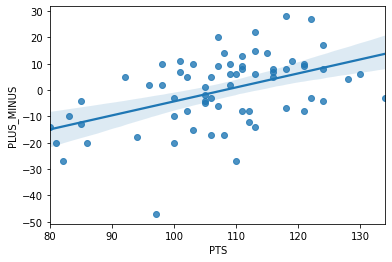

In [21]:
# PTS as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="PTS", y="PLUS_MINUS", data=MH_games_2020)
plt

In [22]:
MH_games_2020[['PTS','PLUS_MINUS']].corr()

,PTS,PLUS_MINUS
PTS,1.000000,0.472824
PLUS_MINUS,0.472824,1.000000


We conclude that PTS vs PLUS_MINUS dont have a strong linear relationship. It means, if the team scores above 100pts doesnt mean they are going to win

### FGM vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

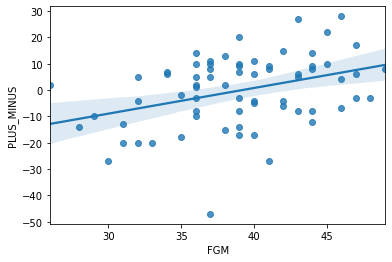

In [23]:
# FGM as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FGM", y="PLUS_MINUS", data=MH_games_2020)
plt

In [24]:
MH_games_2020[['FGM','PLUS_MINUS']].corr()

,FGM,PLUS_MINUS
FGM,1.000000,0.370127
PLUS_MINUS,0.370127,1.000000


### FGA vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

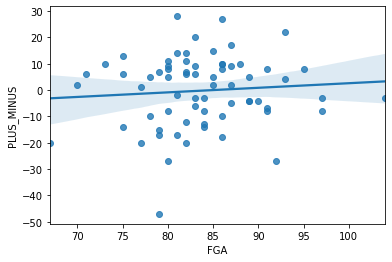

In [25]:
# FGA as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FGA", y="PLUS_MINUS", data=MH_games_2020)
plt

In [26]:
MH_games_2020[['FGA','PLUS_MINUS']].corr()

,FGA,PLUS_MINUS
FGA,1.000000,0.083616
PLUS_MINUS,0.083616,1.000000


### FG_PCT vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

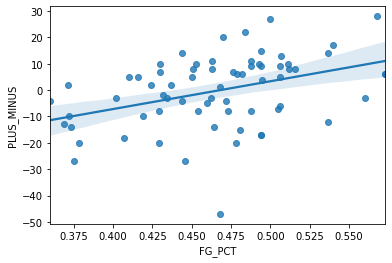

In [27]:
# FG_PCT as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FG_PCT", y="PLUS_MINUS", data=MH_games_2020)
plt

In [28]:
MH_games_2020[['FG_PCT','PLUS_MINUS']].corr()

,FG_PCT,PLUS_MINUS
FG_PCT,1.000000,0.393397
PLUS_MINUS,0.393397,1.000000


### FG3M vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

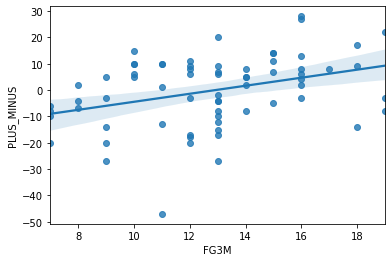

In [29]:
# FG3M as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FG3M", y="PLUS_MINUS", data=MH_games_2020)
plt

In [30]:
MH_games_2020[['FG3M','PLUS_MINUS']].corr()

,FG3M,PLUS_MINUS
FG3M,1.000000,0.353582
PLUS_MINUS,0.353582,1.000000


### FG3A vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

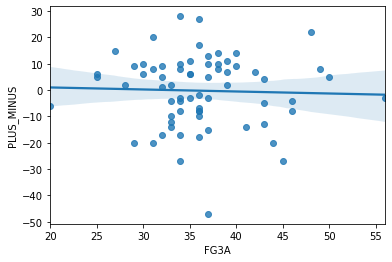

In [31]:
# FG3M as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FG3A", y="PLUS_MINUS", data=MH_games_2020)
plt

In [32]:
MH_games_2020[['FG3A','PLUS_MINUS']].corr()

,FG3A,PLUS_MINUS
FG3A,1.0000,-0.0349
PLUS_MINUS,-0.0349,1.0000


### FG3_PCT vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

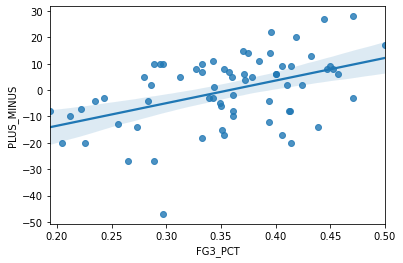

In [33]:
# FG3_PCT as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FG3_PCT", y="PLUS_MINUS", data=MH_games_2020)
plt

In [34]:
MH_games_2020[['FG3_PCT','PLUS_MINUS']].corr()

,FG3_PCT,PLUS_MINUS
FG3_PCT,1.00000,0.45341
PLUS_MINUS,0.45341,1.00000


### FTM vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

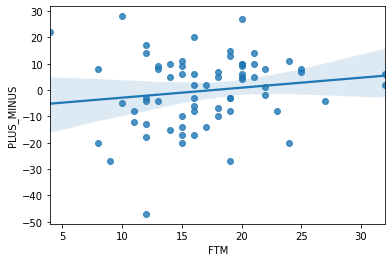

In [35]:
# FTM as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FTM", y="PLUS_MINUS", data=MH_games_2020)
plt

In [36]:
MH_games_2020[['FTM','PLUS_MINUS']].corr()

,FTM,PLUS_MINUS
FTM,1.000000,0.148131
PLUS_MINUS,0.148131,1.000000


### FTA vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

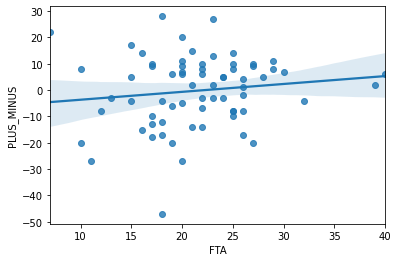

In [37]:
# FTA as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FTA", y="PLUS_MINUS", data=MH_games_2020)
plt

In [38]:
MH_games_2020[['FTA','PLUS_MINUS']].corr()

,FTA,PLUS_MINUS
FTA,1.000000,0.132126
PLUS_MINUS,0.132126,1.000000


### FT_PCT vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

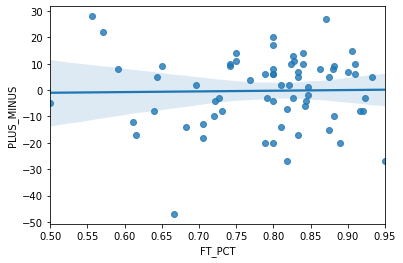

In [39]:
# FT_PCT as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="FT_PCT", y="PLUS_MINUS", data=MH_games_2020)
plt

In [40]:
MH_games_2020[['FT_PCT','PLUS_MINUS']].corr()

,FT_PCT,PLUS_MINUS
FT_PCT,1.000000,0.019036
PLUS_MINUS,0.019036,1.000000


### OREB vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

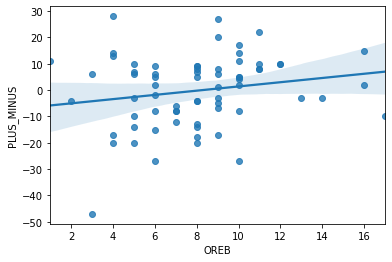

In [41]:
# OREB as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="OREB", y="PLUS_MINUS", data=MH_games_2020)
plt

In [42]:
MH_games_2020[['OREB','PLUS_MINUS']].corr()

,OREB,PLUS_MINUS
OREB,1.000000,0.190579
PLUS_MINUS,0.190579,1.000000


### DREB vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

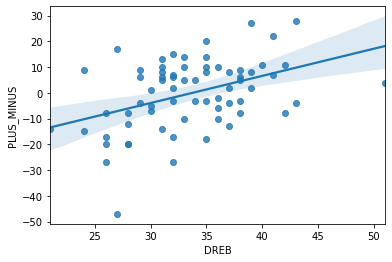

In [43]:
# DREB as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="DREB", y="PLUS_MINUS", data=MH_games_2020)
plt

In [44]:
MH_games_2020[['DREB','PLUS_MINUS']].corr()

,DREB,PLUS_MINUS
DREB,1.000000,0.422715
PLUS_MINUS,0.422715,1.000000


### REB vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

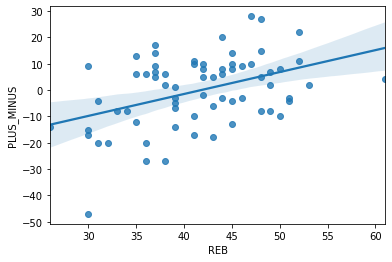

In [45]:
# REB as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="REB", y="PLUS_MINUS", data=MH_games_2020)
plt

In [46]:
MH_games_2020[['REB','PLUS_MINUS']].corr()

,REB,PLUS_MINUS
REB,1.000000,0.422734
PLUS_MINUS,0.422734,1.000000


### AST vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

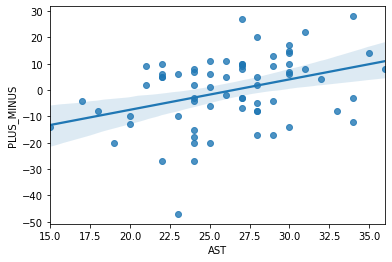

In [47]:
# AST as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="AST", y="PLUS_MINUS", data=MH_games_2020)
plt

In [48]:
MH_games_2020[['AST','PLUS_MINUS']].corr()

,AST,PLUS_MINUS
AST,1.00000,0.37037
PLUS_MINUS,0.37037,1.00000


### STL vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

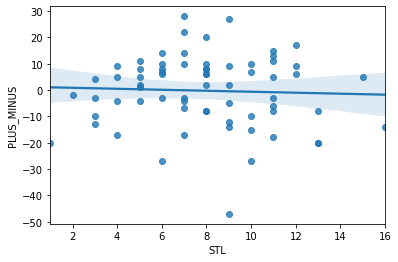

In [49]:
# STL as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="STL", y="PLUS_MINUS", data=MH_games_2020)
plt

In [50]:
MH_games_2020[['STL','PLUS_MINUS']].corr()

,STL,PLUS_MINUS
STL,1.000000,-0.043547
PLUS_MINUS,-0.043547,1.000000


### BLK vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

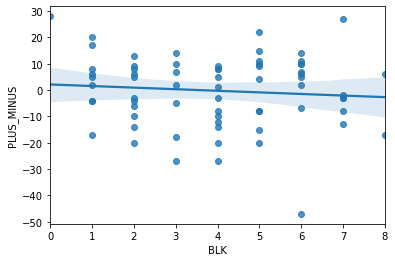

In [51]:
# BLK as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="BLK", y="PLUS_MINUS", data=MH_games_2020)
plt

In [52]:
MH_games_2020[['BLK','PLUS_MINUS']].corr()

,BLK,PLUS_MINUS
BLK,1.000000,-0.091409
PLUS_MINUS,-0.091409,1.000000


### TOV vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

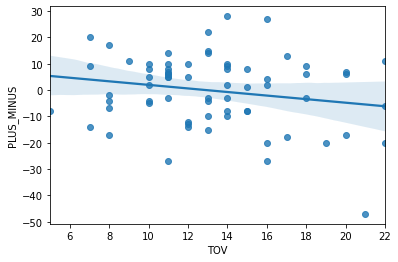

In [53]:
# TOV as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="TOV", y="PLUS_MINUS", data=MH_games_2020)
plt

In [54]:
MH_games_2020[['TOV','PLUS_MINUS']].corr()

,TOV,PLUS_MINUS
TOV,1.000000,-0.199416
PLUS_MINUS,-0.199416,1.000000


### PF vs PLUS_MINUS

<module 'matplotlib.pyplot' from 'C:\\Users\\Gabo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

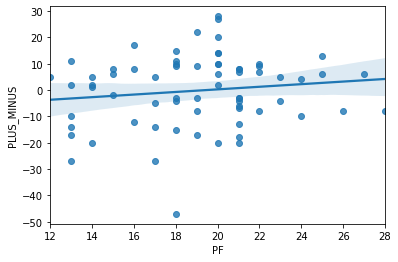

In [55]:
# PF as potential predictor variable of 'PLUS_MINUS'
sns.regplot(x="PF", y="PLUS_MINUS", data=MH_games_2020)
plt

In [56]:
MH_games_2020[['PF','PLUS_MINUS']].corr()

,PF,PLUS_MINUS
PF,1.000000,0.133276
PLUS_MINUS,0.133276,1.000000


<AxesSubplot:xlabel='WL', ylabel='PLUS_MINUS'>

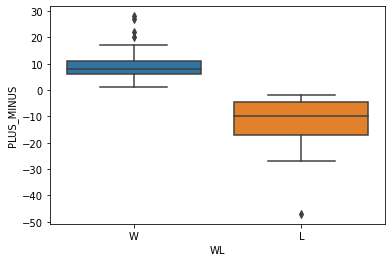

In [57]:
sns.boxplot(x="WL", y="PLUS_MINUS", data=MH_games_2020)

#### We conclude that the variables with highest linear correlation with PLUS_MINUS are the following:
PTS (47% Corr), FG3_PCT(45% Corr), DREB(43% Corr), REB (43% Corr)

### At this point of the Analysis we know that the variables doesn't have a strong linear relationship and it is analogus to say that a Linear Regression Model wont fit the data and will not be a good model to predict if the Heat wins the next game. However we will perform the model to demostrate it will not work

## 5.- Multiple Linear Regression

First we create the database that we will use in our model:

In [58]:
cdf=MH_games_2020[['PTS','FG3_PCT','DREB','REB','PLUS_MINUS']]
cdf


,PTS,FG3_PCT,DREB,REB,PLUS_MINUS
0,130,0.457,32,35,6.0
1,121,0.406,29,37,9.0
2,113,0.439,31,39,-14.0
3,121,0.289,31,42,10.0
4,124,0.500,27,37,17.0
...,...,...,...,...,...
63,83,0.212,36,41,-10.0
64,119,0.385,42,52,11.0
65,97,0.297,27,30,-47.0
66,111,0.432,31,35,13.0


#### We create our train/test data

In [59]:
y_data=cdf['PLUS_MINUS']
x_data=cdf.drop('PLUS_MINUS',axis=1)

Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [60]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 11
number of training samples: 57


Now, WE PERFORM OUR MULTIPLE LINEAR REGRESSION MODEL:

In [61]:
from sklearn import linear_model

In [62]:
lre=linear_model.LinearRegression()

In [63]:
lre.fit(x_train, y_train)

LinearRegression()

In [64]:
## R^2 for the prediction accuracy score
lre.score(x_test, y_test)

0.08201898532257401

In [65]:
## R^2 for the trainning accuracy score
lre.score(x_train, y_train)

0.4187234242928273

In [66]:
## Coeficients
lre.coef_

array([ 0.27848178, 70.13114163,  0.60133648,  0.28081886])

In [67]:
## Cross Validation
from sklearn.model_selection import cross_val_score

In [68]:
Rcross=cross_val_score(lre,x_data,y_data,cv=4)

In [69]:
Rcross

array([ 0.37244172, -0.08197447,  0.09230058,  0.35926014])

In [70]:
yhat_train=lre.predict(x_train)
yhat_train[0:5]

array([-13.34462707,   6.14152469, -11.39994109,   0.8852507 ,
         6.88953374])

In [71]:
yhat_test=lre.predict(x_test)
yhat_test[0:5]

array([  1.63851755,  -2.69750121,  12.62863162, -22.13162988,
        13.63661746])

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('PLUS_MINUS')
    plt.ylabel('Model')

    plt.show()
    plt.close()

C:\Users\Gabo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


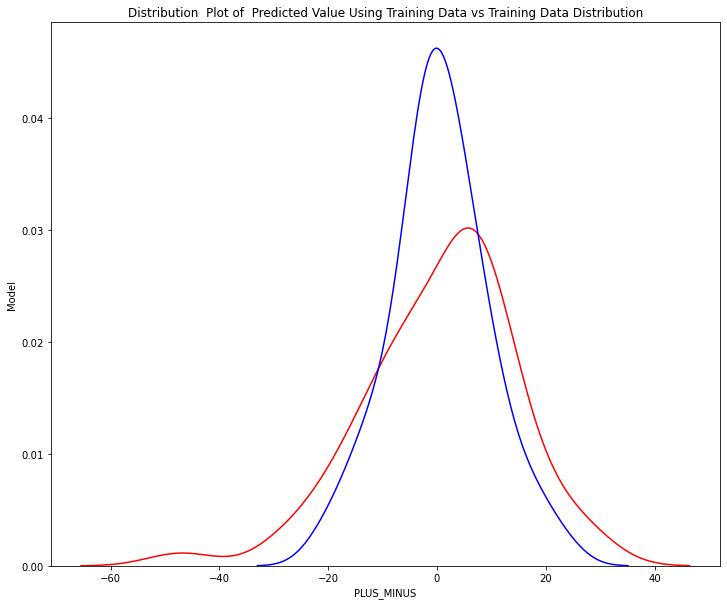

In [74]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Gabo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Gabo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


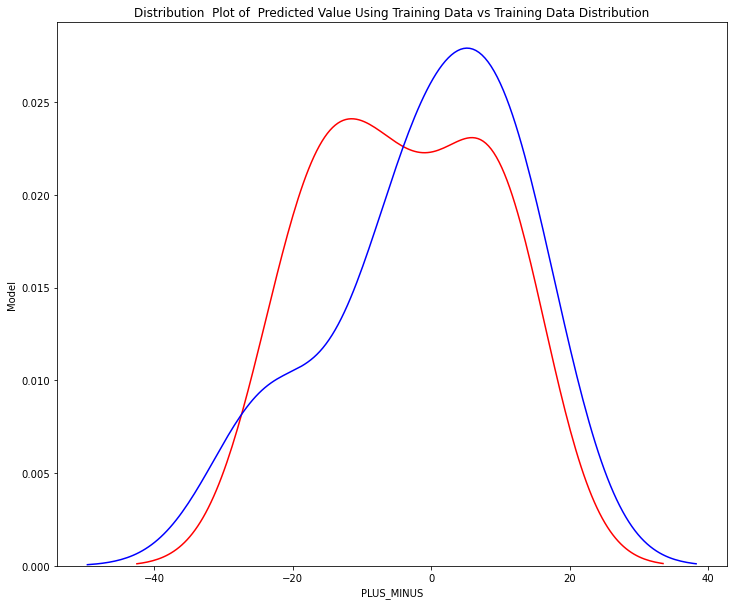

In [75]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Conclusion: Regarding the linearity of certain variables, we conclude that it is not possible to use a Linear Regression Model to predict if the Miami Heat will win or not.

### On the other hand we know that the PTS, REB and FG3_PCT have an average correlation of 44%, which means that these variables have an impact on the outcome of the game..

### We will need to perform another type of analysis to predict the probability of winning for the Miami Heat in season 20-21

# 6.- Logistic Regression

## We will develope a classification model to calculate the probability of winning of the Miami Heat

First we prepare our dataset to fit our model, in which we will assign 1 to those games won and 0 to those games lost

In [76]:
# We have our original dataset
MH_games_2020.head()

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,W,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,6.0
1,W,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,9.0
2,L,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,-14.0
3,W,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,10.0
4,W,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,17.0


In [77]:
## Convert WL into a dummy where 1=W and 0=L
for ind,row in MH_games_2020.iterrows():
    if MH_games_2020.loc[ind,"WL"]=='W':
        MH_games_2020.loc[ind,"Win"]=1
    else:
        MH_games_2020.loc[ind,"Win"]=0

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [78]:
MH_games_2020

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,Win
0,W,130,47,82,0.573,16,35,0.457,20,22,...,3,32,35,30,8,2,11,20,6.0,1.0
1,W,121,44,87,0.506,13,32,0.406,20,27,...,8,29,37,27,9,2,14,22,9.0,1.0
2,L,113,39,84,0.464,18,41,0.439,17,21,...,8,31,39,30,9,2,12,17,-14.0,0.0
3,W,121,45,88,0.511,11,38,0.289,20,27,...,11,31,42,30,10,6,11,22,10.0,1.0
4,W,124,47,87,0.540,18,36,0.500,12,15,...,10,27,37,30,12,1,8,16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,L,83,29,78,0.372,7,33,0.212,18,25,...,5,36,41,20,10,2,14,24,-10.0,0.0
64,W,119,40,82,0.488,15,39,0.385,24,29,...,10,42,52,25,5,5,22,18,11.0,1.0
65,L,97,37,79,0.468,11,37,0.297,12,18,...,3,27,30,23,9,6,21,18,-47.0,0.0
66,W,111,38,75,0.507,16,37,0.432,19,23,...,4,31,35,29,11,2,17,25,13.0,1.0


In [79]:
MH_games_2020.drop(['WL'],axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
MH_games_2020.head(10)

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,Win
0,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,6.0,1.0
1,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,9.0,1.0
2,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,-14.0,0.0
3,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,10.0,1.0
4,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,17.0,1.0
5,116,43,85,0.506,9,25,0.360,21,24,0.875,10,38,48,26,4,1,12,23,5.0,1.0
6,102,36,84,0.429,7,36,0.194,23,25,0.920,6,28,34,18,13,4,5,19,-8.0,0.0
7,106,36,80,0.450,14,37,0.378,20,24,0.833,6,31,37,22,11,2,10,12,5.0,1.0
8,103,38,79,0.481,13,37,0.351,14,16,0.875,6,24,30,24,10,5,13,18,-15.0,0.0
9,107,39,83,0.470,13,31,0.419,16,20,0.800,9,35,44,28,8,1,7,20,20.0,1.0


In [81]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

Now, we define our dependent and independent variables

In [82]:
## Definning X and Y for our prediction Model
X=np.asarray(MH_games_2020.drop(['Win'],axis=1))
X[0:1]

array([[130.   ,  47.   ,  82.   ,   0.573,  16.   ,  35.   ,   0.457,
         20.   ,  22.   ,   0.909,   3.   ,  32.   ,  35.   ,  30.   ,
          8.   ,   2.   ,  11.   ,  20.   ,   6.   ]])

In [83]:
Y=np.asarray(MH_games_2020[['Win']])
Y[0:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

NORMALIZE THE DATA SET SO THAT WE CAN PERFORM OUR LOGISTIC REGRESION:

In [84]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.86500003,  1.57346584, -0.25162177,  2.13411815,  1.03515945,
        -0.18656444,  1.43768565,  0.57677065,  0.0913441 ,  1.20488708,
        -1.5571607 , -0.2776294 , -0.94731432,  0.86035014,  0.02803738,
        -0.95025527, -0.57005767,  0.28265357,  0.46409246],
       [ 1.11507886,  0.98772308,  0.51911158,  0.80164696,  0.07528432,
        -0.67450219,  0.72080659,  0.57677065,  0.93072235, -0.48651498,
         0.00459339, -0.83288821, -0.65517204,  0.16662908,  0.34579439,
        -0.95025527,  0.18508366,  0.83180908,  0.68685684],
       [ 0.44848227,  0.01148515,  0.05667157, -0.03363349,  1.6750762 ,
         0.78931107,  1.18466951,  0.00559972, -0.07653155,  0.20816801,
         0.00459339, -0.46271567, -0.36302975,  0.86035014,  0.34579439,
        -0.95025527, -0.31834389, -0.54107969, -1.02100341],
       [ 1.11507886,  1.18297067,  0.67325825,  0.90108511, -0.56463243,
         0.30137332, -0.9237983 ,  0.57677065,  0.93072235, -0.48651498,
         0.941

### Train/Test

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (57, 19) (57, 1)
Test set: (11, 19) (11, 1)


### Modeling Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='liblinear')

In [87]:
Yhat = LR.predict(X_test)
Yhat

array([1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.])

In [88]:
Yhat_prob = LR.predict_proba(X_test)
Yhat_prob

array([[0.44244624, 0.55755376],
       [0.73508603, 0.26491397],
       [0.68318599, 0.31681401],
       [0.65475938, 0.34524062],
       [0.47493235, 0.52506765],
       [0.36477439, 0.63522561],
       [0.52844392, 0.47155608],
       [0.44043699, 0.55956301],
       [0.52387737, 0.47612263],
       [0.43995739, 0.56004261],
       [0.36799574, 0.63200426]])

In [90]:
# Calculate the accuracy of the model
from sklearn.metrics import log_loss
log_loss(Y_test, Yhat_prob)

0.5484482521539082

In the following cells we will calculate the accuracy of the model using a part of the dataset.

In [94]:
## Import the games' dataset to calculate the accuracy of our classification model
prueba=pd.read_excel('MH.xlsx',usecols="B:U",sheet_name='Sheet1')
prueba

,WL,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,W,116,43,85,0.506,9,25,0.360,21,24,0.875,10,38,48,26,4,1,12,23,5
1,L,102,36,84,0.429,7,36,0.194,23,25,0.920,6,28,34,18,13,4,5,19,-8
2,W,106,36,80,0.450,14,37,0.378,20,24,0.833,6,31,37,22,11,2,10,12,5
3,L,103,38,79,0.481,13,37,0.351,14,16,0.875,6,24,30,24,10,5,13,18,-15
4,W,107,39,83,0.470,13,31,0.419,16,20,0.800,9,35,44,28,8,1,7,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,L,83,29,78,0.372,7,33,0.212,18,25,0.720,5,36,41,20,10,2,14,24,-10
59,W,119,40,82,0.488,15,39,0.385,24,29,0.828,10,42,52,25,5,5,22,18,11
60,L,97,37,79,0.468,11,37,0.297,12,18,0.667,3,27,30,23,9,6,21,18,-47
61,W,111,38,75,0.507,16,37,0.432,19,23,0.826,4,31,35,29,11,2,17,25,13


In [95]:
## Using the last 20 games
prueba=prueba.head(20)
prueba.drop(['WL'], axis=1, inplace=True)
prueba

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,116,43,85,0.506,9,25,0.360,21,24,0.875,10,38,48,26,4,1,12,23,5
1,102,36,84,0.429,7,36,0.194,23,25,0.920,6,28,34,18,13,4,5,19,-8
2,106,36,80,0.450,14,37,0.378,20,24,0.833,6,31,37,22,11,2,10,12,5
3,103,38,79,0.481,13,37,0.351,14,16,0.875,6,24,30,24,10,5,13,18,-15
4,107,39,83,0.470,13,31,0.419,16,20,0.800,9,35,44,28,8,1,7,20,20
5,113,45,93,0.484,19,48,0.396,4,7,0.571,11,41,52,31,7,5,13,19,22
6,109,38,87,0.437,16,39,0.410,17,21,0.810,16,37,53,28,9,1,16,13,2
7,111,39,80,0.488,14,34,0.412,19,26,0.731,7,26,33,33,11,5,14,28,-8
8,106,39,79,0.494,13,32,0.406,15,18,0.833,4,26,30,29,7,8,8,13,-17
9,86,31,82,0.378,9,44,0.205,15,19,0.789,8,28,36,24,13,2,16,20,-20


In [96]:
# Transform the dataset
prueb = preprocessing.StandardScaler().fit(prueba).transform(prueba)

In [97]:
# Predection with new values
Yhat_Prueba=LR.predict(prueb)
Yhat_Prueba

array([1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0.])

In [98]:
# Probability of winning
Yhat_prob_prueba = LR.predict_proba(prueb)
Yhat_prob_prueba

array([[0.43048417, 0.56951583],
       [0.63307874, 0.36692126],
       [0.46827522, 0.53172478],
       [0.61275864, 0.38724136],
       [0.38385363, 0.61614637],
       [0.3547912 , 0.6452088 ],
       [0.40256663, 0.59743337],
       [0.50564084, 0.49435916],
       [0.58191326, 0.41808674],
       [0.70406609, 0.29593391],
       [0.50360472, 0.49639528],
       [0.42141621, 0.57858379],
       [0.51588925, 0.48411075],
       [0.40044931, 0.59955069],
       [0.4343708 , 0.5656292 ],
       [0.52788893, 0.47211107],
       [0.51099792, 0.48900208],
       [0.53027842, 0.46972158],
       [0.42697112, 0.57302888],
       [0.54435077, 0.45564923]])

In [99]:
Prediccion=pd.DataFrame(Yhat_Prueba)
Prediccion

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
5,1.0
6,1.0
7,0.0
8,0.0
9,0.0


In [100]:
Probabilidad=pd.DataFrame(Yhat_prob_prueba)
Probabilidad

,0,1
0,0.430484,0.569516
1,0.633079,0.366921
2,0.468275,0.531725
3,0.612759,0.387241
4,0.383854,0.616146
5,0.354791,0.645209
6,0.402567,0.597433
7,0.505641,0.494359
8,0.581913,0.418087
9,0.704066,0.295934


In [101]:
## Final Result
Resultado=pd.concat([prueba,Prediccion,Probabilidad], axis=1)
Resultado

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,0,0,1
0,116,43,85,0.506,9,25,0.360,21,24,0.875,...,48,26,4,1,12,23,5,1.0,0.430484,0.569516
1,102,36,84,0.429,7,36,0.194,23,25,0.920,...,34,18,13,4,5,19,-8,0.0,0.633079,0.366921
2,106,36,80,0.450,14,37,0.378,20,24,0.833,...,37,22,11,2,10,12,5,1.0,0.468275,0.531725
3,103,38,79,0.481,13,37,0.351,14,16,0.875,...,30,24,10,5,13,18,-15,0.0,0.612759,0.387241
4,107,39,83,0.470,13,31,0.419,16,20,0.800,...,44,28,8,1,7,20,20,1.0,0.383854,0.616146
5,113,45,93,0.484,19,48,0.396,4,7,0.571,...,52,31,7,5,13,19,22,1.0,0.354791,0.645209
6,109,38,87,0.437,16,39,0.410,17,21,0.810,...,53,28,9,1,16,13,2,1.0,0.402567,0.597433
7,111,39,80,0.488,14,34,0.412,19,26,0.731,...,33,33,11,5,14,28,-8,0.0,0.505641,0.494359
8,106,39,79,0.494,13,32,0.406,15,18,0.833,...,30,29,7,8,8,13,-17,0.0,0.581913,0.418087
9,86,31,82,0.378,9,44,0.205,15,19,0.789,...,36,24,13,2,16,20,-20,0.0,0.704066,0.295934


We see that the model made the right prediction in 16 out of 20 cases so the accuracy will be :16/20= 80%

Another way to calculate the accuracy without doing the excercise we did is to make a cross validation accuracy method.

In [102]:
##Rcross=cross_val_score(LR,X,Y,cv=4)
Rcross=cross_val_score(LR,X,Y,cv=5)

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

In [103]:
Rcross

array([0.85714286, 0.71428571, 0.85714286, 0.84615385, 0.84615385])

In [107]:
Rcross.mean().round(2)

0.82

### Now that we have perform a cross validation technique, we can conclude that the accuracy of the classification model is around 82%.

## We will perform a Logistic Regression Model but this time, we will not use the "Plus Minus" variable. This is because it doesnt make sence to predict the probability of winning or losing by using the plus minus points. We want to know probability of winning by using points, rebounds, assists, etc, but not the PLUS_MINUS variable.

First we need a proper dataset which is droping the plus minus variable

In [108]:
## Heres is my normal dataset
MH_games_2020

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,Win
0,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,6.0,1.0
1,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,9.0,1.0
2,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,-14.0,0.0
3,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,10.0,1.0
4,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,83,29,78,0.372,7,33,0.212,18,25,0.720,5,36,41,20,10,2,14,24,-10.0,0.0
64,119,40,82,0.488,15,39,0.385,24,29,0.828,10,42,52,25,5,5,22,18,11.0,1.0
65,97,37,79,0.468,11,37,0.297,12,18,0.667,3,27,30,23,9,6,21,18,-47.0,0.0
66,111,38,75,0.507,16,37,0.432,19,23,0.826,4,31,35,29,11,2,17,25,13.0,1.0


In [109]:
## Drop PLus Minus
MH_games_2020.drop(['PLUS_MINUS'],axis=1,inplace=True)

C:\Users\Gabo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [110]:
MH_games_2020

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Win
0,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,1.0
1,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,1.0
2,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,0.0
3,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,1.0
4,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,83,29,78,0.372,7,33,0.212,18,25,0.720,5,36,41,20,10,2,14,24,0.0
64,119,40,82,0.488,15,39,0.385,24,29,0.828,10,42,52,25,5,5,22,18,1.0
65,97,37,79,0.468,11,37,0.297,12,18,0.667,3,27,30,23,9,6,21,18,0.0
66,111,38,75,0.507,16,37,0.432,19,23,0.826,4,31,35,29,11,2,17,25,1.0


Now we create our train/test split and perform our logistic regression Model

In [111]:
## Definning X and Y for our prediction Model
X1=np.asarray(MH_games_2020.drop(['Win'],axis=1))
X1[0:1]

array([[130.   ,  47.   ,  82.   ,   0.573,  16.   ,  35.   ,   0.457,
         20.   ,  22.   ,   0.909,   3.   ,  32.   ,  35.   ,  30.   ,
          8.   ,   2.   ,  11.   ,  20.   ]])

In [112]:
Y1=np.asarray(MH_games_2020[['Win']])
Y1[0:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [113]:
#Normalize X1 so we can perform Logistic Regression
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 1.86500003,  1.57346584, -0.25162177,  2.13411815,  1.03515945,
        -0.18656444,  1.43768565,  0.57677065,  0.0913441 ,  1.20488708,
        -1.5571607 , -0.2776294 , -0.94731432,  0.86035014,  0.02803738,
        -0.95025527, -0.57005767,  0.28265357],
       [ 1.11507886,  0.98772308,  0.51911158,  0.80164696,  0.07528432,
        -0.67450219,  0.72080659,  0.57677065,  0.93072235, -0.48651498,
         0.00459339, -0.83288821, -0.65517204,  0.16662908,  0.34579439,
        -0.95025527,  0.18508366,  0.83180908],
       [ 0.44848227,  0.01148515,  0.05667157, -0.03363349,  1.6750762 ,
         0.78931107,  1.18466951,  0.00559972, -0.07653155,  0.20816801,
         0.00459339, -0.46271567, -0.36302975,  0.86035014,  0.34579439,
        -0.95025527, -0.31834389, -0.54107969],
       [ 1.11507886,  1.18297067,  0.67325825,  0.90108511, -0.56463243,
         0.30137332, -0.9237983 ,  0.57677065,  0.93072235, -0.48651498,
         0.94164585, -0.46271567,  0.07518368,  0.860

### Train/Test Split

In [114]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.15, random_state=4)
print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)

Train set: (57, 18) (57, 1)
Test set: (11, 18) (11, 1)


### Modeling Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR1 = LogisticRegression(C=0.01, solver='saga').fit(X1_train,Y1_train)
LR1

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='saga')

In [116]:
Yhat1 = LR1.predict(X1_test)
Yhat1

array([1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.])

In [117]:
Yhat_prob1 = LR1.predict_proba(X1_test)
Yhat_prob1

array([[0.42487474, 0.57512526],
       [0.57497093, 0.42502907],
       [0.6021956 , 0.3978044 ],
       [0.54061868, 0.45938132],
       [0.45405994, 0.54594006],
       [0.37162486, 0.62837514],
       [0.47354732, 0.52645268],
       [0.36730943, 0.63269057],
       [0.51027998, 0.48972002],
       [0.41303489, 0.58696511],
       [0.34701063, 0.65298937]])

In [118]:
from sklearn.metrics import log_loss
log_loss(Y1_test, Yhat_prob1)

0.6109673777947392

In [119]:
Rcross=cross_val_score(LR1,X1,Y1,cv=5)

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

In [120]:
Rcross

array([0.78571429, 0.42857143, 0.64285714, 0.69230769, 0.69230769])

In [122]:
Rcross.mean().round(2)

0.65

The accuracy of the model is 65%. A good model for us to use has to have an accuracy above 70%

Another way to measure accuracy on a classification model is through confusion matrix

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y1_test, Yhat1, labels=[1,0]))

[[5 1]
 [2 3]]


Confusion matrix, without normalization
[[5 1]
 [2 3]]


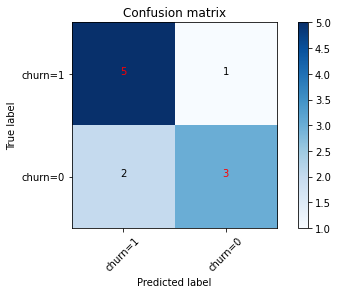

In [124]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y1_test, Yhat1, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [125]:
print (classification_report(Y1_test, Yhat1))

              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67         5
         1.0       0.71      0.83      0.77         6

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11



#### Now that we performed a logistic regression, we see that the accuracy of the model is 65%. So now we know we need to try with anothe classification model. We will perform many of them and will take the one with the highest accuracy

## K NEAREST

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
k=8
# train model and predict
neigh=KNeighborsClassifier(n_neighbors= k).fit(X1_train,Y1_train)
neigh

<ipython-input-127-4dcfaaf75998>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh=KNeighborsClassifier(n_neighbors= k).fit(X1_train,Y1_train)


KNeighborsClassifier(n_neighbors=8)

In [128]:
## PREDICTING
Yhat2=neigh.predict(X1_test)
Yhat2

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.])

In [129]:
## ACCURACY EVALUATION
from sklearn import metrics
metrics.accuracy_score(Y1_train, neigh.predict(X1_train))

0.7017543859649122

In [130]:
metrics.accuracy_score(Y1_test, neigh.predict(X1_test))

0.8181818181818182

In [131]:
Rcross=cross_val_score(neigh,X1,Y1,cv=5)

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was

In [132]:
Rcross

array([0.71, 0.71, 0.57, 0.69, 0.77])

In [134]:
Rcross.mean().round(2)

0.69

In [135]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
    Yhat3=neigh.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(Y1_test, Yhat3)

    
    std_acc[n-1]=np.std(Yhat3==Y1_test)/np.sqrt(Yhat3.shape[0])

mean_acc

<ipython-input-135-5d50d8d6c755>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
<ipython-input-135-5d50d8d6c755>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
<ipython-input-135-5d50d8d6c755>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
<ipython-input-135-5d50d8d6c755>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighbor

array([0.64, 0.73, 0.82, 0.64, 0.82, 0.82, 0.82, 0.82, 0.82])

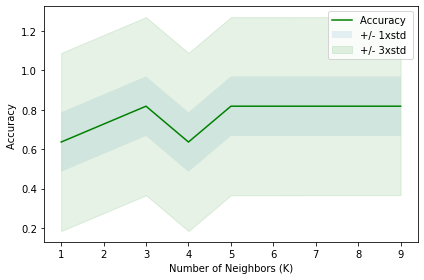

In [136]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#### KNearest has an accuracy of 69% with 8 neighbors. it is the closests to 70% so we might take this classification model for our predictions, but before we make a conclusion we take a look at the other classification model

## Support Vector Machine

In [137]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X1_train, Y1_train) 

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [138]:
Yhat4=clf.predict(X1_test)
Yhat4[0:5]

array([1., 0., 0., 0., 1.])

In [139]:
Rcross=cross_val_score(clf,X1,Y1,cv=5)

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

In [140]:
Rcross

array([0.64, 0.5 , 0.57, 0.69, 0.69])

In [142]:
Rcross.mean().round(2)

0.62

## We conclude that the classification model that best fits the data is the k nearest model with an accuracy of 69%.

## Now that we have a model to tell us if the heat will win or lose, we need to know which variables have an impact on it and measure the impact they have on the outcome of the game. To do this we will perform a clusterization model

## 7.- Clusterization model

In [143]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [144]:
# First we select our dataset to perform a clusterization model
from sklearn.preprocessing import StandardScaler
CLUST = MH_games_2020.values[:,1:]
CLUST = np.nan_to_num(CLUST)
Clus_dataSet = StandardScaler().fit_transform(CLUST)
Clus_dataSet

array([[ 1.57, -0.25,  2.13, ..., -0.57,  0.28,  0.92],
       [ 0.99,  0.52,  0.8 , ...,  0.19,  0.83,  0.92],
       [ 0.01,  0.06, -0.03, ..., -0.32, -0.54, -1.09],
       ...,
       [-0.38, -0.71,  0.05, ...,  1.95, -0.27, -1.09],
       [-0.18, -1.33,  0.82, ...,  0.94,  1.66,  0.92],
       [ 0.6 , -0.1 ,  0.8 , ...,  2.2 ,  0.56, -1.09]])

In [145]:
# Perform the clusterization model starting with 3 neighbours
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(CLUST)
labels = k_means.labels_
print(labels)

[0 2 0 1 0 1 2 2 0 1 1 1 2 0 0 0 2 0 0 2 2 1 0 0 1 1 0 1 1 1 0 1 2 0 1 1 2
 2 1 1 1 0 1 1 2 1 1 1 1 2 1 0 1 2 0 1 0 2 2 1 1 2 1 2 1 0 2 1]


In [148]:
# Take a look at our database with the clusterization model
MH_games_2020["Clust_km"]=labels
MH_games_2020.head(10)

<ipython-input-148-6b4329bfc090>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MH_games_2020["Clust_km"]=labels


,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Win,Clust_km
0,130,47,82,0.573,16,35,0.457,20,22,0.909,3,32,35,30,8,2,11,20,1.0,0
1,121,44,87,0.506,13,32,0.406,20,27,0.741,8,29,37,27,9,2,14,22,1.0,2
2,113,39,84,0.464,18,41,0.439,17,21,0.810,8,31,39,30,9,2,12,17,0.0,0
3,121,45,88,0.511,11,38,0.289,20,27,0.741,11,31,42,30,10,6,11,22,1.0,1
4,124,47,87,0.540,18,36,0.500,12,15,0.800,10,27,37,30,12,1,8,16,1.0,0
5,116,43,85,0.506,9,25,0.360,21,24,0.875,10,38,48,26,4,1,12,23,1.0,1
6,102,36,84,0.429,7,36,0.194,23,25,0.920,6,28,34,18,13,4,5,19,0.0,2
7,106,36,80,0.450,14,37,0.378,20,24,0.833,6,31,37,22,11,2,10,12,1.0,2
8,103,38,79,0.481,13,37,0.351,14,16,0.875,6,24,30,24,10,5,13,18,0.0,0
9,107,39,83,0.470,13,31,0.419,16,20,0.800,9,35,44,28,8,1,7,20,1.0,1


In [149]:
MH_games_2020.groupby('Clust_km').mean().round(2)

,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,Win
Clust_km,,,,,,,,,,,,,,,,,,,
0,105.53,39.58,82.11,0.48,12.58,35.95,0.35,13.79,17.89,0.77,5.95,29.05,35.00,26.21,9.37,4.21,12.00,17.32,0.32
1,109.48,40.29,87.52,0.46,13.16,37.16,0.36,15.74,19.87,0.79,9.97,37.52,47.48,26.58,7.26,3.74,14.23,19.45,0.65
2,106.61,35.94,78.56,0.46,12.28,34.61,0.36,22.44,27.94,0.80,6.72,31.28,38.00,25.83,7.50,4.00,12.94,19.89,0.61


### Now that we have the clusters of our data, we will identify the variables that have a significant difference between clusters:
### We look that the only huge difference between clusters are the PTS, DREB and REB. This confirms that thess variables are the ones impacting the outcome of the game. NOTE that these variables were the ones with the highest correlation in the linear analysis we perform in the first section of this notebook. So we have evidence that this variables have an impact on the outcome of the game.



#### Cluster 0: It has a 32% probability of winning with average of 105 PTS, 29 DREB, and 35 REB
#### Cluster 1: It has a 65% probability of winning with average of 109 PTS, 38 DREB, and 47 REB
#### Cluster 2: It has a 61% probability of winning with average of 106 PTS, 31 DREB, and 38 REB

## 8.- Cluster only using PTS, DREB, REB and Win

In [150]:
# Create our new dataset
Base_Class_Model=MH_games_2020[['PTS','DREB','REB','Win']]
Base_Class_Model

,PTS,DREB,REB,Win
0,130,32,35,1.0
1,121,29,37,1.0
2,113,31,39,0.0
3,121,31,42,1.0
4,124,27,37,1.0
...,...,...,...,...
63,83,36,41,0.0
64,119,42,52,1.0
65,97,27,30,0.0
66,111,31,35,1.0


In [151]:
## Definning X and Y for our prediction Model
X3=np.asarray(Base_Class_Model.drop(['Win'],axis=1))
X3[0:1]

array([[130,  32,  35]], dtype=int64)

In [152]:
Y3=np.asarray(Base_Class_Model[['Win']])
Y3[0:5]

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.]])

In [153]:
#Normalize X2 so we can perform Logistic Regression
from sklearn import preprocessing
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
X3[0:5]

array([[ 1.87, -0.28, -0.95],
       [ 1.12, -0.83, -0.66],
       [ 0.45, -0.46, -0.36],
       [ 1.12, -0.46,  0.08],
       [ 1.37, -1.2 , -0.66]])

In [154]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, Y3_train, Y3_test = train_test_split( X3, Y3, test_size=0.15, random_state=4)
print ('Train set:', X3_train.shape,  Y3_train.shape)
print ('Test set:', X3_test.shape,  Y3_test.shape)

Train set: (57, 3) (57, 1)
Test set: (11, 3) (11, 1)


In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR3=LogisticRegression(C=0.01, solver='saga').fit(X3_train, Y3_train)
LR3

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, solver='saga')

In [165]:
Yhat3 = LR3.predict(X3_test)
Yhat3

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [167]:
Yhat_prob3=LR3.predict_proba(X3_test)
Yhat_prob3

array([[0.46, 0.54],
       [0.52, 0.48],
       [0.52, 0.48],
       [0.49, 0.51],
       [0.47, 0.53],
       [0.46, 0.54],
       [0.48, 0.52],
       [0.41, 0.59],
       [0.48, 0.52],
       [0.42, 0.58],
       [0.4 , 0.6 ]])

In [168]:
Rcross=cross_val_score(LR3,X3,Y3,cv=5)

C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Gabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

In [169]:
Rcross

array([0.79, 0.57, 0.57, 0.77, 0.62])

In [170]:
Rcross.mean().round(2)

0.66

### The accuracy of our Logistic Regression Model increased with the new database from 62% to 66%

## Now, we perform our clusterization model

In [171]:
from sklearn.preprocessing import StandardScaler
Cbase = Base_Class_Model.values[:,1:]
Cbase = np.nan_to_num(Cbase)
Clus_dataSet = StandardScaler().fit_transform(Cbase)
Clus_dataSet

array([[-0.28, -0.95,  0.92],
       [-0.83, -0.66,  0.92],
       [-0.46, -0.36, -1.09],
       [-0.46,  0.08,  0.92],
       [-1.2 , -0.66,  0.92],
       [ 0.83,  0.95,  0.92],
       [-1.02, -1.09, -1.09],
       [-0.46, -0.66,  0.92],
       [-1.76, -1.68, -1.09],
       [ 0.28,  0.37,  0.92],
       [ 1.39,  1.54,  0.92],
       [ 0.65,  1.68,  0.92],
       [-1.39, -1.24, -1.09],
       [-1.39, -1.68, -1.09],
       [-1.02, -0.8 , -1.09],
       [-1.76, -1.68,  0.92],
       [-0.83, -0.51,  0.92],
       [-1.02, -0.95, -1.09],
       [-0.09, -0.66,  0.92],
       [-0.28, -0.66,  0.92],
       [ 0.09,  0.08,  0.92],
       [ 0.28,  0.81,  0.92],
       [-0.65, -0.36, -1.09],
       [ 0.09, -0.36, -1.09],
       [-0.09,  1.24, -1.09],
       [ 0.83,  1.39, -1.09],
       [-1.39, -0.8 , -1.09],
       [ 1.76,  1.39, -1.09],
       [-0.28,  0.95,  0.92],
       [-0.09,  0.22,  0.92],
       [ 1.2 , -0.07,  0.92],
       [ 0.28,  0.37,  0.92],
       [ 0.46, -0.07,  0.92],
       [-2

In [172]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Cbase)
labels = k_means.labels_
print(labels)

[0 0 0 1 0 2 0 0 0 1 2 2 0 0 0 0 0 0 0 0 1 1 0 1 1 2 0 2 1 1 1 1 1 0 1 2 1
 1 2 1 2 0 1 2 0 1 2 1 2 0 1 0 1 0 0 1 0 0 1 1 2 1 2 1 2 0 0 1]


In [173]:
Base_Class_Model["Clust_km"]=labels
Base_Class_Model.head(10)

<ipython-input-173-707bfef5b6c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base_Class_Model["Clust_km"]=labels


,PTS,DREB,REB,Win,Clust_km
0,130,32,35,1.0,0
1,121,29,37,1.0,0
2,113,31,39,0.0,0
3,121,31,42,1.0,1
4,124,27,37,1.0,0
5,116,38,48,1.0,2
6,102,28,34,0.0,0
7,106,31,37,1.0,0
8,103,24,30,0.0,0
9,107,35,44,1.0,1


In [174]:
Base_Class_Model.groupby('Clust_km').mean().round(2)

,PTS,DREB,REB,Win
Clust_km,,,,
0,106.64,28.61,34.82,0.43
1,106.23,34.85,43.77,0.58
2,112.14,40.79,50.57,0.71


### Now, with our new data set we take a look at each cluster:

### Cluster 0: It has a probability of winning of 43% with an average of 106 PTS, 29 DREB and 35 REB
### Cluster 1: It has a probability of winning of 58% with an average of 106 PTS, 35 DREB and 44 REB
### Cluster 2: It has a probability of winning of 71% with an average of 112 PTS, 41 DREB and 51 REB

## We have enough data that tells us that the PTS, DREB and REB are the variables impacting on the Miami Heat's games outcomes.

## Conclusion: In order for the Miami Heat to win needs to score more than 112 PTS and grab more than 41 DREB.

In [177]:
##
##k_means_centers=k_means.cluster_centers_
##k_means_centers

No handles with labels found to put in legend.


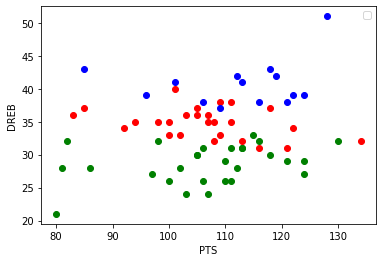

In [187]:
df1=Base_Class_Model[Base_Class_Model['Clust_km']==0]
df2=Base_Class_Model[Base_Class_Model['Clust_km']==1]
df3=Base_Class_Model[Base_Class_Model['Clust_km']==2]

plt.scatter(df1['PTS'],df1['DREB'], color='green')
plt.scatter(df2['PTS'],df2['DREB'], color='red')
plt.scatter(df3['PTS'],df3['DREB'], color='blue')

plt.xlabel('PTS')
plt.ylabel('DREB')
plt.legend()

### In this visualization cluster 0 is color green, cluster 1 is color red, and cluster 2 is color blue.

### We see the difference between clusters and the cluster in color blue has more datapoints with more than 109 PTS.

In [184]:
## Just to check the array od the database
Base_Class_Model.iloc[:, 1]

0     32
1     29
2     31
3     31
4     27
      ..
63    36
64    42
65    27
66    31
67    36
Name: DREB, Length: 68, dtype: int64

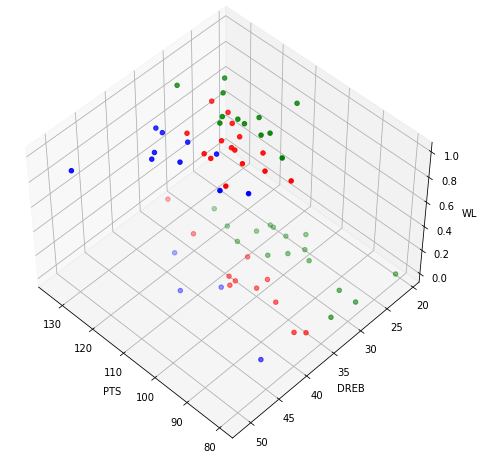

In [188]:
## visualization of PTS, DREB and winning
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('PTS')
ax.set_ylabel('DREB')
ax.set_zlabel('WL')

ax.scatter(df1.iloc[:, 0], df1.iloc[:, 1], df1.iloc[:, 3], c= 'green')
ax.scatter(df2.iloc[:, 0], df2.iloc[:, 1], df2.iloc[:, 3], c= 'red')
ax.scatter(df3.iloc[:, 0], df3.iloc[:, 1], df3.iloc[:, 3], c= 'blue')

### The percentage of blue points in the winning ratio (Z-axis), is higher than the other colors.

## 9.- Conclusion and insights:

## A) We built a prediction model to tell us if the Miami Heat will win or lose the next game (Logistic Regression)

## B) We discover that the Defensive Rebounds and the number of Poinst in a game determines whether the Miami Heat will win or lose.

## C) In order to win the next game the Heat will need to score more than 112 points and grab more than 41 Defensive Rebounds.

## D) With this insights it is important that the Heat makes the right adjustments in order to perform well in Playoffs